# 1.白葡萄酒数据导入与查看

## 1.1使用CSV库导入并将数据存放到列表中

In [1]:
import csv           #导入CSV库

with open(r".\data\white_wine.csv",mode='r') as f: #以只读的方式打开
    reader = csv.reader(f)
    content=[]
    for row in reader:
        content.append(row)
print(content[0])     #显示数据的第一行，也就是白葡萄酒样本对应的各个变量属性


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 1.2使用pandas库导入数据并查看数据类型

In [2]:
import pandas as pd

io = r".\data\white_wine.csv"
data = pd.read_csv(io,header=0)   #Pandas的read_csv方法可以读取CSV文档,header=0表示设置第0行为表头/列名
df = pd.DataFrame(data)          #将数据data转换成DataFrame格式，即二维表格式
df = df.iloc[:,:]               
# iloc利用index的具体位置(所以只能是整数型参数)，来获取想要的行(或列),
# 这里我们是获得全部的行和列,如果只是要获取某一个变量,如quality,
# 则可以将第二个冒号':'换成11
df.dtypes                        # 查看各个变量的类型

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


```python
df = df.iloc[:,:]
```

这一行使用 DataFrame 的 `iloc` 属性来选取数据。`iloc` 是基于位置的索引，它接受整数位置作为参数。这里的 `:` 表示选取所有行和所有列。实际上，这一步骤也是多余的，因为 DataFrame `df` 已经包含了所有数据。如果需要选取特定的行或列，可以修改这里的索引值。例如，要选取名为 "quality" 的列，可以使用 `df.iloc[:, 11]`，假设 "quality" 是第 12 列（索引从 0 开始）。


#  2.数据描述性统计及数据分布

## 2.1数据描述性统计

In [3]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


`data.describe(include='all')` 这个参数告诉我们`.describe() `方法包含所有类型的列（不仅仅是数值型）。默认情况下，.describe() 只会对数值列进行统计分析，但通过设置 include='all'，也可以得到非数值列的统计信息。
对于数值列，输出通常包括以下几项：
- **count**：非空值的数量。
- **mean**：平均值。
- **std**：标准差，衡量数据分布的离散程度。
- **min**：最小值。
- **25%**：第一四分位数（Q1），即第25百分位点，表示有25%的数据小于或等于这个值。
- **50%**：第二四分位数（中位数），即第50百分位点，表示有50%的数据小于或等于这个值。
- **75%**：第三四分位数（Q3），即第75百分位点，表示有75%的数据小于或等于这个值。
- **max**：最大值。

对于非数值列（如字符串或分类数据），输出可能包括：
- **count**：非空值的数量。
- **unique**：唯一值的数量。
- **top**：出现频率最高的值。
- **freq**：最高频率值的出现次数。

## 2.2数据分布

<Axes: >

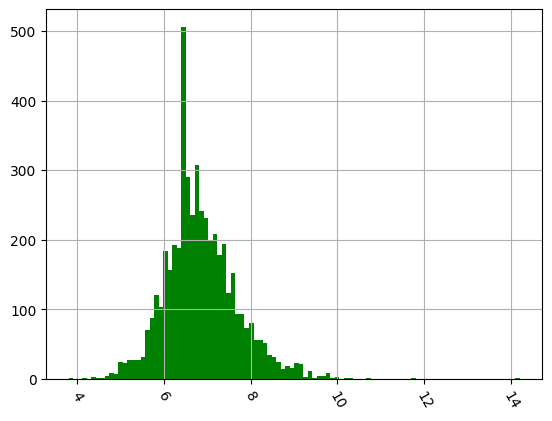

In [4]:
# 画出固定酸含量分布图
import numpy as np
from matplotlib import pyplot as plt

df_0 = df.iloc[:,0]  #第0列则表示第一个样本固定酸含量特征，如果要绘制其他特征可以使用其索引   
df_0.hist(grid=True,bins=100,color='g', alpha=1,xrot=300,xlabelsize=10)


```python
df.hist(grid=True, bins=100, color='g', alpha=1, xrot=300, xlabelsize=10)
```

这一行使用 Pandas 的 `hist` 方法来绘制直方图。这个方法是在 Series 或 DataFrame 上的一个便捷函数，它会自动使用 Matplotlib 创建直方图。以下是参数说明：

- `grid=True`: 显示网格线。
- `bins=100`: 直方图的柱子数量为 100。
- `color='g'`: 柱子的颜色为绿色。
- `alpha=1`: 设置柱子的透明度为 1（完全不透明）。
- `xrot=300`: 这个参数在 Matplotlib 中实际上是 `xticks` 的旋转角度，但在 Pandas 的 `hist` 方法中并不直接支持这个参数。通常情况下，如果需要旋转 x 轴的标签，你需要使用 Matplotlib 的 `xticklabels` 的 `set_rotation` 方法。
- `xlabelsize=10`: 设置 x 轴标签的字体大小为 10。

<Axes: >

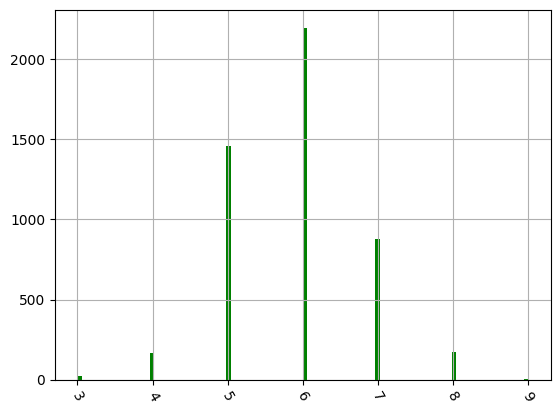

In [5]:
# 画出品质特征分布图
import numpy as np
from matplotlib import pyplot as plt

df_11 = df.iloc[:,11]  #第11列表示样本品质特征
df_11.hist(grid=True,bins=100,color='g', alpha=1,xrot=300,xlabelsize=10)   

## 3.数据清洗

## 3.1列名重命名

In [6]:
df = df.iloc[:,:]
ch_name = ['固定酸度','挥发性酸度','柠檬酸','残糖','氯化物','游离二氧化硫','总二氧化硫','密度','pH值','硫酸盐','酒精','葡萄酒品质']
df.columns = ch_name
df

,固定酸度,挥发性酸度,柠檬酸,残糖,氯化物,游离二氧化硫,总二氧化硫,密度,pH值,硫酸盐,酒精,葡萄酒品质
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 3.2数据类型处理

In [7]:
df.dtypes

固定酸度      float64
挥发性酸度     float64
柠檬酸       float64
残糖        float64
氯化物       float64
游离二氧化硫    float64
总二氧化硫     float64
密度        float64
pH值       float64
硫酸盐       float64
酒精        float64
葡萄酒品质       int64
dtype: object

## 3.3查看缺失值

In [8]:
df.isnull( ).sum(axis=0)  #沿垂直方向求和

固定酸度      0
挥发性酸度     0
柠檬酸       0
残糖        0
氯化物       0
游离二氧化硫    0
总二氧化硫     0
密度        0
pH值       0
硫酸盐       0
酒精        0
葡萄酒品质     0
dtype: int64

## 3.4异常值处理

In [9]:
df.describe()

,固定酸度,挥发性酸度,柠檬酸,残糖,氯化物,游离二氧化硫,总二氧化硫,密度,pH值,硫酸盐,酒精,葡萄酒品质
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# 4 数据分析

## 4.1葡萄酒品质评分分析
### 4.1.1 品质评分频数统计

In [10]:
print(sorted(df['葡萄酒品质'].unique()))
df.葡萄酒品质.value_counts()                #这里使用了两种形式访问数据样本特征

[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


葡萄酒品质
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

### 4.1.2 绘制品质评分直方图

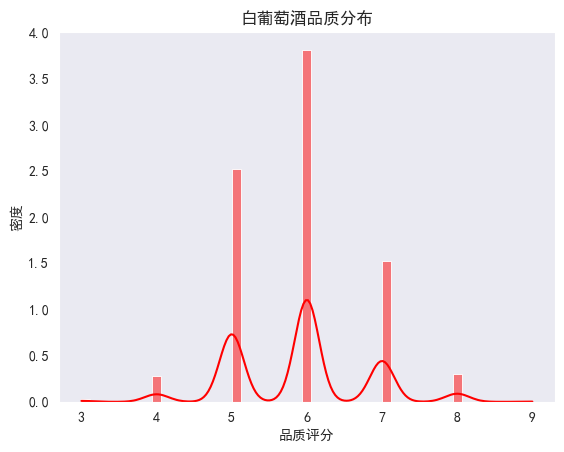

In [11]:
import seaborn as sns
# 使用seaborn画图
plt.figure()
sns.set_style('dark')   #设置背景为灰色，sns.set( )设置主题，调色板更常用
sns.histplot(df['葡萄酒品质'], kde=True, color='red', stat='density')
# norm_hist如果设置为False，则直方图高度就显示计数而非密度
plt.xlabel('品质评分')
plt.ylabel('密度')
plt.title('白葡萄酒品质分布')
plt.rcParams['font.sans-serif']=['SimHei']    #用于设置字体
plt.rcParams['axes.unicode_minus'] = False   #用于现实负号
plt.show()


```python
import seaborn as sns
```

这一行导入了 seaborn 库，并给它指定了一个简短的别名 `sns`。Seaborn 是一个基于 matplotlib 的 Python 数据可视化库，它提供了更高级别的接口来制作统计图表。

```python
plt.figure()
```

创建一个新的图形窗口。如果没有这行代码，默认情况下每次绘制时都会在同一个窗口中添加新的图层。而 `plt.figure()` 创建一个新的空白窗口，这样你可以控制每个窗口中的图表。

```python
sns.set_style('dark')
```

设置 seaborn 的绘图风格为暗色（'dark'）。这个风格会在背景上使用深色的颜色，使得前景中的线条和标记更加突出。可以通过 `sns.axes_style()` 查看可用的其他风格。

```python
sns.histplot(df['葡萄酒品质'], kde=True, color='red', stat='density')
```

使用 `sns.histplot()` 函数绘制数据框 df 中 '葡萄酒品质' 列的数据分布图。参数说明如下：
- `norm_hist=True`: 将直方图的高度归一化到 1，使得其面积代表概率密度而不是简单的计数。
- `kde=True`: 启用核密度估计（Kernel Density Estimation），这是一种平滑化的概率密度函数估计方法。
- `stat='density'`: stat 参数决定了直方图柱子的高度所代表的统计量。当 stat='density' 时，直方图柱子的高度表示的是概率密度，即每个区间内数据点的相对频率，所有柱子下的面积总和为 1。此外，stat 还支持其他取值，如 'count'（默认值，表示每个区间内数据点的数量）、'probability'（每个区间内数据点的比例）等。

```python
plt.rcParams['axes.unicode_minus'] = False
```

设置 matplotlib 不使用 unicode 字符来显示负号。这通常是因为一些中文字体可能不包含负号的 unicode 字符。

## 4.2 化学成分相关性分析

In [12]:
df.corr()

,固定酸度,挥发性酸度,柠檬酸,残糖,氯化物,游离二氧化硫,总二氧化硫,密度,pH值,硫酸盐,酒精,葡萄酒品质
固定酸度,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
挥发性酸度,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
柠檬酸,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
残糖,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
氯化物,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
游离二氧化硫,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
总二氧化硫,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
密度,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH值,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
硫酸盐,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


`df.corr()` 是 Pandas 库中 DataFrame 对象的一个方法，用于计算 DataFrame 中各列之间的相关性系数。相关性系数是衡量两个变量之间线性关系强度和方向的统计指标，其取值范围在 -1 到 1 之间，具体含义如下：
- `相关性系数为 1`：表示两个变量之间存在完全正相关关系，即一个变量增加，另一个变量也会随之增加。
- `相关性系数为 -1`：表示两个变量之间存在完全负相关关系，即一个变量增加，另一个变量会随之减少。
- `相关性系数为 0`：表示两个变量之间不存在线性相关关系。

## 4.3线性回归模型建立

### 4.3.1 样本选择与自变量标准化处理

In [13]:
# 样本选择全样本
# 定义一个dependent_variable变量来存放葡萄酒品质数据（因变量）
dependent_variable = df['葡萄酒品质']
# 定义一个independent_variable变量存放除葡萄酒品质以外的其他所有变量（自变量）
independent_variable = df[df.columns.difference(['葡萄酒品质'])]
# 下面进行自变量的标准化处理
independent_variable_standardized = (independent_variable - independent_variable.mean())/independent_variable.std()
# 形成标准化后的数据集
wine_standardized = pd.concat([dependent_variable,independent_variable_standardized],axis=1)  #按列合并，横向合并
wine_standardized

,葡萄酒品质,pH值,固定酸度,密度,总二氧化硫,挥发性酸度,柠檬酸,残糖,氯化物,游离二氧化硫,硫酸盐,酒精
0,6,-1.246794,0.172079,2.331274,0.744489,-0.081762,0.213258,2.821061,-0.035351,0.569873,-0.349149,-1.393010
1,6,0.739953,-0.657434,-0.009153,-0.149669,0.215874,0.047996,-0.944669,0.147732,-1.252891,0.001342,-0.824192
2,6,0.475053,1.475600,0.358628,-0.973236,0.017450,0.543783,0.100272,0.193503,-0.312109,-0.436771,-0.336633
3,6,0.011479,0.409083,0.525802,1.120977,-0.478608,-0.117266,0.415726,0.559670,0.687471,-0.787262,-0.499152
4,6,0.011479,0.409083,0.525802,1.120977,-0.478608,-0.117266,0.415726,0.559670,0.687471,-0.787262,-0.499152
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6,0.541278,-0.775936,-0.965385,-1.090889,-0.677032,-0.365159,-0.944669,-0.309976,-0.664902,0.088964,0.557225
4894,5,-0.253420,-0.301928,0.291759,0.697428,0.414297,0.213258,0.317146,0.056190,1.275460,-0.261526,-0.742932
4895,6,-1.313019,-0.420430,-0.497299,-0.643809,-0.379397,-1.191470,-1.023532,-0.218435,-0.312109,-0.261526,-0.905451
4896,7,1.004853,-1.605449,-1.784534,-0.667340,0.116662,-0.282528,-1.043248,-1.088081,-0.900098,-0.962507,1.857382


```python
independent_variable_standardized = (independent_variable - independent_variable.mean())/independent_variable.std()
```

对 `independent_variable` 进行标准化处理，即将每个特征减去其均值，然后除以其标准差。这是为了消除不同特征之间数值范围的影响，使它们具有相同的尺度。

```python
wine_standardized = pd.concat([dependent_variable,independent_variable_standardized],axis=1)
```

这里使用 Pandas 的 `concat` 方法将 `dependent_variable`（即葡萄酒品质列）与标准化后的自变量 `independent_variable_standardized` 拼接在一起，形成一个新的 DataFrame `wine_standardized`。`axis=1` 表示沿着列的方向拼接。

### 4.3.2 建立回归模型

In [14]:
import statsmodels.formula.api as smf
# 定义回归数学公式
my_regression = '葡萄酒品质~pH值+固定酸度+密度+总二氧化硫+挥发性酸度+'\
                '柠檬酸+残糖+氯化物+游离二氧化硫+硫酸盐+酒精'
my_standardized = smf.ols(my_regression, data=wine_standardized).fit()
print(my_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                  葡萄酒品质   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:53:58   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8779      0.011    547.502      0.0

这段代码使用 `statsmodels` 库中的 `ols`（普通最小二乘法）函数来进行多元线性回归分析。

```python
import statsmodels.formula.api as smf
```

这里导入了 `statsmodels` 库中的 `formula.api` 模块，并给它指定了一个简短的别名 `smf`。这个模块允许我们使用 R 风格的公式来指定模型。

```python
my_regression = '葡萄酒品质~pH值+固定酸度+密度+总二氧化硫+挥发性酸度+'\
                '柠檬酸+残糖+氯化物+游离二氧化硫+硫酸盐+酒精'
```

定义了一个字符串 `my_regression`，该字符串描述了要拟合的回归模型的公式。这里 `'葡萄酒品质'` 是因变量，后面的变量是自变量。`+` 符号表示这些自变量是模型中的预测因子。

```python
my_standardized = smf.ols(my_regression, data=wine_standardized).fit()
```

这行代码创建并拟合了一个多元线性回归模型。具体步骤如下：
- `smf.ols(my_regression, data=wine_standardized)`: 使用 `smf.ols` 函数定义一个多元线性回归模型，其中 `my_regression` 是模型的公式，`data=wine_standardized` 指定数据集。
- `.fit()`: 拟合模型。

```python
print(my_standardized.summary())
```

这行代码输出模型的摘要信息，输出结果包含模型的统计指标，这些可以帮助我们评估模型的有效性及自变量对因变量的影响。
- `coef (Coefficient，系数)`：回归系数，它表示自变量对因变量的影响程度。
- `std err (Standard Error，标准误差)`：估计系数的标准误差。标准误差衡量了估计系数的不确定性。标准误差越小，估计值越精确。
- `t (t 统计量)`：用于检验回归系数是否显著不为零。它是回归系数与标准误差的比值。
- `P>|t| (p 值)`：p 值是进行假设检验时的重要指标。它表示在原假设（系数为零）成立的情况下，观察到当前数据或更极端数据的概率。通常，如果 p 值小于某个阈值（如 0.05），则认为该系数显著不同于零。
- `[0.025, 0.975] (置信区间)`：这是回归系数的 95% 置信区间。它给出了一个范围，在这个范围内我们有 95% 的信心认为真实的系数值位于此区间内。

In [15]:
# 输出每个变量的系数
coefficients = my_standardized.params
print("所有变量的系数:")
print(coefficients)

所有变量的系数:
Intercept    5.877909
pH值          0.103638
固定酸度         0.055290
密度          -0.449486
总二氧化硫       -0.012144
挥发性酸度       -0.187798
柠檬酸          0.002673
残糖           0.413285
氯化物         -0.005402
游离二氧化硫       0.063484
硫酸盐          0.072068
酒精           0.238095
dtype: float64


### 线性回归模型为：
葡萄酒品质= 0.1036*pH值+0.0553*固定酸度-0.4495*密度-0.0121*总二氧化硫-0.1878*挥发性酸度+0.0027*柠檬酸+0.4133*残糖-0.0054*氯化物+0.0635*游离二氧化硫+0.0721*硫酸盐+0.2381*酒精+5.8779

## 4.4预测

### 注意事项
有了这个线性回归模型，对新的样本而言就可以预测出其相应的品质，结果的准确程度取决于模型的好坏，本案例的模型泛化能力不一定好，原因是因为我们并没有在模型训练的时候对数据集进行划分，应该将一部分数据集作为训练样本，而另一部分作为测试样本，之后选择一个得分较好的模型作为最终的预测模型，这样就可以提升模型的泛化能力。
